# Today: EDA GROUPS!

Choose a team, and then spend some time looking at data.  We want you to explore the data using the techniques we learned this far including:

- Grouping / subsetting / segmentation
- Summary statistics
    - Histograms
    - Plotting
- Slicing
- Cleaning data
    - assessing proper types
    - expected values
    - object converstion
   

At the end of our exploratory analysis, each group will be giving a 10 minute presentation on their findings to the rest of class.


In [6]:
import pandas as pd, numpy as np, seaborn as sns

%matplotlib inline

## Team Alpha Drone

Since the API from `api.dronestre.am` provides data on drone strikes in near real time, this **might** be useful to hold President Obama accountable to his promise of reducing drone strikes.  Your mission, is to explore drone strike data, doing any accomanying research with your analysis, and report back any good summary statistics.

Also, we would like to know:
 - Is this a good source of data?
     - Why / why not?
     
*Politics aside -- let's keep it to what is measurable in our dataset.  This isn't meant to prove or disprove anything.  It's a **fun** dataset to look at moreso than a motivator of political discourse.*

In [7]:
# First we need to fetch some data using Python requests from API
# Read more about Python requests:
# http://docs.python-requests.org/en/master/user/quickstart/

import requests

response = requests.get("http://api.dronestre.am/data")
json_data = response.json()
drone_df = pd.DataFrame(json_data['strike'])

In [8]:
drone_df.head(1)

,_id,articles,bij_link,bij_summary_short,bureau_id,children,civilians,country,date,deaths,...,injuries,lat,location,lon,names,narrative,number,target,town,tweet_id
0,55c79e711cbee48856a30886,[],http://www.thebureauinvestigates.com/2012/03/2...,In the first known US targeted assassination u...,YEM001,,0,Yemen,2002-11-03T00:00:00.000Z,6,...,,15.47467,Marib Province,45.322755,"[Qa'id Salim Sinan al-Harithi, Abu Ahmad al-Hi...",In the first known US targeted assassination u...,1,,,278544689483890688


In [28]:
drone_df['deaths_max'] = pd.to_numeric(drone_df['deaths_max'], errors='coerce')

In [29]:
drone_df.info()
print drone_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 22 columns):
_id                  621 non-null object
articles             621 non-null object
bij_link             621 non-null object
bij_summary_short    621 non-null object
bureau_id            621 non-null object
children             621 non-null object
civilians            621 non-null object
country              621 non-null object
date                 621 non-null object
deaths               621 non-null object
deaths_max           617 non-null float64
deaths_min           621 non-null object
injuries             621 non-null object
lat                  621 non-null object
location             621 non-null object
lon                  621 non-null object
names                621 non-null object
narrative            621 non-null object
number               621 non-null int64
target               621 non-null object
town                 621 non-null object
tweet_id             621 non-null 

In [30]:


drone_pak = drone_df[drone_df['country'] == 'Pakistan']
drone_yem = drone_df[drone_df['country'] == 'Yemen']
drone_som = drone_df[drone_df['country'] == 'Somalia']



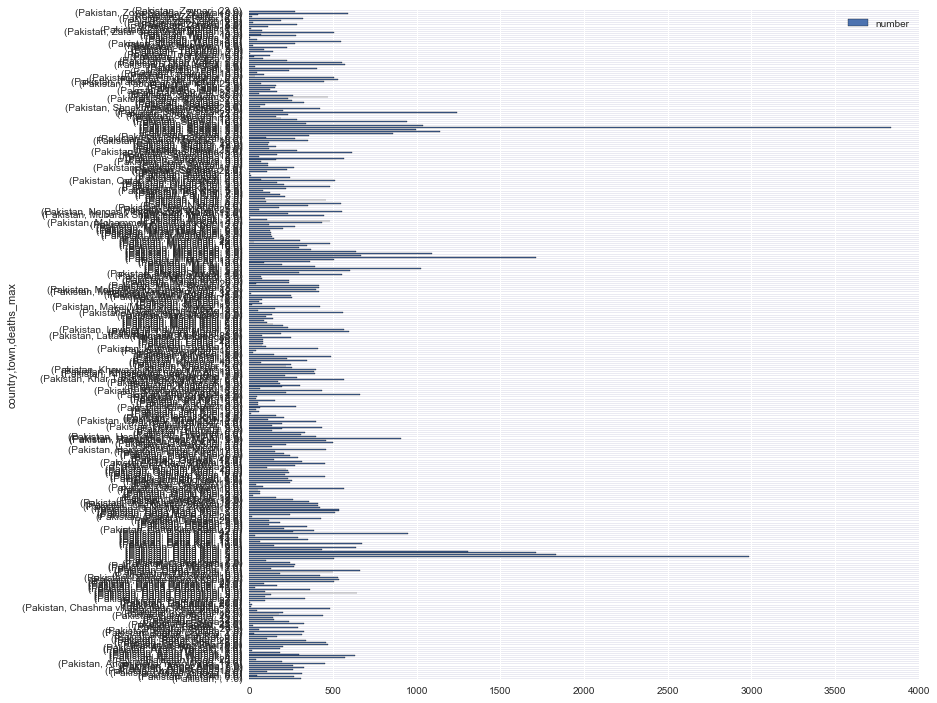

In [36]:
ct_town_pak_max = drone_pak.groupby(['country','town','deaths_max']).sum()
ct_town_pak_max
ct_town_pak_max.plot(kind = 'barh', figsize = (12,12))

## Team Popcorn

You're a force to be reckoned with when you `read_csv` into your `movie_df` dataframe.  You are team "Popcorn".  It would be nice to know:

 - Which movies remained in the top 10 the longest
 - Which movies were good investments?
 
 Bonus:
 - Do any holidays impact sales performance or position?


_[There's a data dictionary available!](http://www.amstat.org/publications/jse/v17n1/datasets.mclaren.html)_

In [59]:
movie_df = pd.read_csv("../assets/data/movie_weekend.csv")
movie_df.head(5)

,NUMBER,MOVIE,WEEK_NUM,WEEKEND_PER_THEATER,WEEKEND_DATE
0,1.0,A Beautiful Mind,1.0,701.0,12/21/01
1,1.0,A Beautiful Mind,2.0,14820.0,12/28/01
2,1.0,A Beautiful Mind,3.0,8940.0,1/4/02
3,1.0,A Beautiful Mind,4.0,6850.0,1/11/02
4,1.0,A Beautiful Mind,5.0,5280.0,1/18/02


## Team Titanic

Known for it's honesty, the Titanic dataset is a very common dataset for doing classification prediction of fatalities.  For our challenge, why don't we try to focus on the latent characteristics. 

For the record, this is how much know:

![](http://www.glencoe.com/sec/math/studytools/books/0-07-829631-5/images/IQ02-003W-8228662.gif)

Certainly there is a better story to tell.

**Bonus**
 - Can you pull out titles (ie: Mr., Miss, Mrs) from the feature "Name" and assign it to a new variable? We think there could be something interesting to look at in aggregate based on titles!

In [61]:
titanic_df = pd.read_csv("../assets/data/titanic.csv")
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
